In [3]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))

Python: 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
Numpy: 1.16.5
Pandas: 0.24.2
Matplotlib: 3.0.3
Seaborn: 0.9.0
Scipy: 1.3.1


In [0]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load the dataset from the csv file using pandas
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard (2).csv


KeyboardInterrupt: ignored

In [0]:
data = pd.read_csv('creditcard.csv')

In [11]:
# Start exploring the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [19]:
df.sample(5)

NameError: ignored

In [0]:
#info
df.info()

In [12]:
# Print the shape of the data
data = data.sample(frac=0.1, random_state = 1)
print(data.shape)
print(data.describe())

(17362, 31)
                Time            V1  ...        Amount         Class
count   17362.000000  17362.000000  ...  17362.000000  17362.000000
mean    61783.266329     -0.172588  ...     87.318157      0.001901
std     28632.801802      1.889280  ...    256.537945      0.043557
min         2.000000    -34.148234  ...      0.000000      0.000000
25%     41185.000000     -0.985015  ...      5.777500      0.000000
50%     60992.500000     -0.192322  ...     21.350000      0.000000
75%     79210.500000      1.188799  ...     77.192500      0.000000
max    121551.000000      2.401777  ...  11898.090000      1.000000

[8 rows x 31 columns]


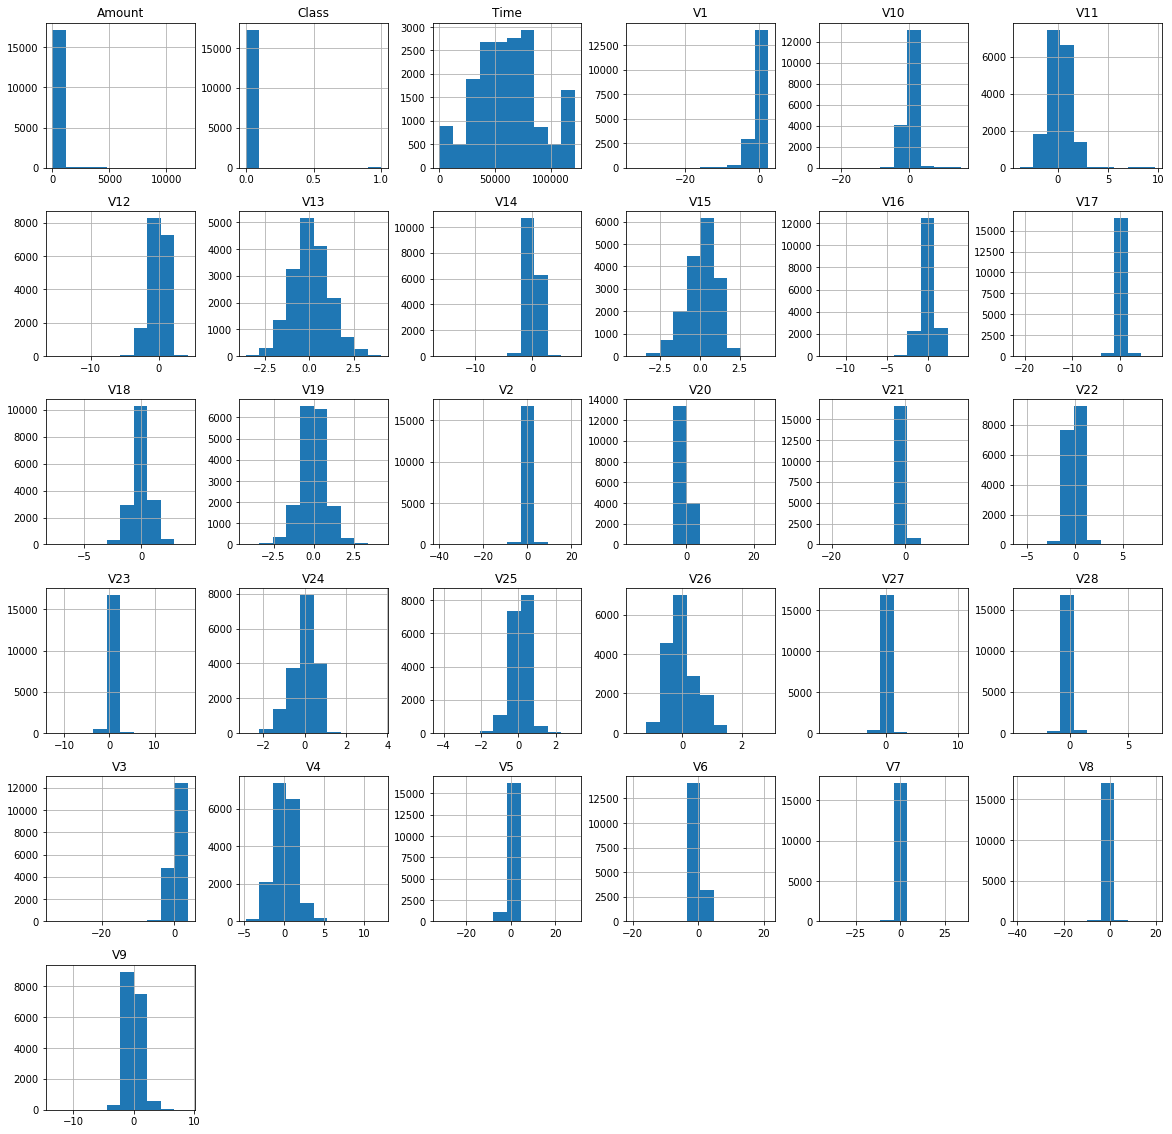

In [13]:
# Plot histograms of each parameter 
data.hist(figsize = (20, 20))
plt.show()

In [0]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

In [0]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

In [0]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

In [14]:
# Determine number of fraud cases in dataset

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0019043222344047551
Fraud Cases: 33
Valid Transactions: 17329


In [0]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [0]:
corr = df.corr()
corr

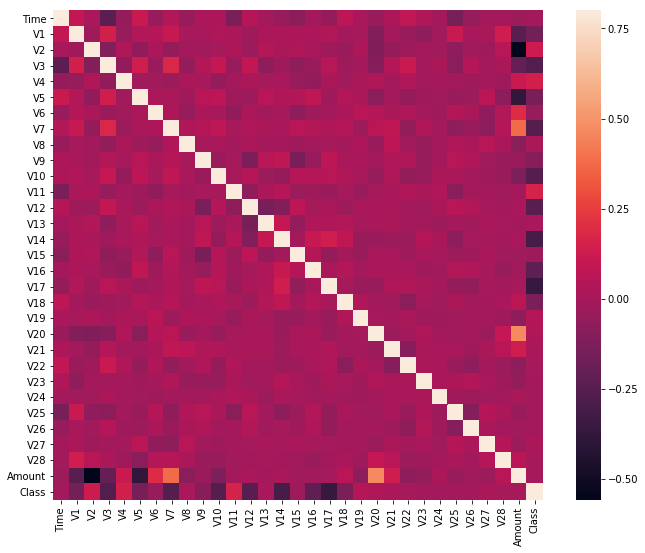

In [15]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.title('Heatmap of Correlation')
plt.show()

In [0]:
#skewness
skew_ = df.skew()
skew_

In [16]:
# Get all the columns from the dataFrame
columns = data.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we'll be predicting on
target = "Class"

X = data[columns]
Y = data[target]

# Print shapes
print(X.shape)
print(Y.shape)

(17362, 30)
(17362,)


In [0]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

In [18]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 45
0.9974081327036056
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17329
         1.0       0.32      0.33      0.33        33

    accuracy                           1.00     17362
   macro avg       0.66      0.67      0.66     17362
weighted avg       1.00      1.00      1.00     17362

Local Outlier Factor: 67
0.9961409975809239
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17329
         1.0       0.00      0.00      0.00        33

    accuracy                           1.00     17362
   macro avg       0.50      0.50      0.50     17362
weighted avg       1.00      1.00      1.00     17362



<Figure size 648x504 with 0 Axes>